**For Accessing Drive Contents**






In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

#Ekush Dataset
**Ekhus** is the largest dataset of handwritten Bangla characters for research on handwritten Bangla character recognition. The Ekush database contains handwritten Bengali digits (০ through ৯), letters and can provide a baseline for testing Bengali digit and letter recognition using the machine and deep learning architecture.


<div align="center">
<img src="https://drive.google.com/uc?id=1CcAG-Et-fpvtVh7Kjv7ZU7Ih6HmwbzRT" width="200">
<img src="https://drive.google.com/uc?id=1qPn7h0YyKLEC3GHwDJAs5jf8oNQLJnvF" width="200">
<img src="https://drive.google.com/uc?id=1x5_DN8uzGFOVhqSK4OVsEwuWy3FBHZZU" width="200">
</div>
<div align="center">
<img src="https://drive.google.com/uc?id=1A9HcemWBWa7vHlfvmZYwO8uDXcaAGeGg" width="200">
<img src="https://drive.google.com/uc?id=1PAJrQ4bQxxopv-UI_YcM81lxoE8dvCGK" width="200">
<img src="https://drive.google.com/uc?id=1HDm1iy2FBQSHELXDFxx3TlBaqViGJ-Vn" width="200">
<figcaption>figure 1: Ekush dataset Snapshot</figcaption>
</div>

</div>



**Importing Necessary Libaries**

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models

#**Pre Processing**

---
In the website ([https://shahariarrabby.github.io/ekush/#home](https://) ) I found two CSV files of the male and female dataset with the raw image data. As their task was to classify Bengali digits so there are ten labels. But my given task was to find that whether the written digit was written by a male or female. So I need to change the label of the CSV files. So there is two way I found out to solve the problem. One way is I just change the label column using pandas library as CSV file contains all pixel values. Another approach is to use the raw image and creative CSV with image Id and labeling of male or female. As I completed my Numtadb dataset assignment earlier with the raw image I decided to use the same formatting code and choose to work with the raw data of the Ekhush dataset. In their raw data folder male and female written digit were separated into different folders according to digit values. I merged and renamed those images for both males and females and put them into two folders. Then I reshaped those images into 200*200 dimensions as images were not in the same dimensions and created two new folders containing male and female.
#Re-size code
```
from PIL import Image
import glob
import os

# new folder path (may need to alter for Windows OS)
# change path to your path
path = 'C:/Users/Anas/Downloads/archive/female_digit'
# create new folder
if not os.path.exists(path):
    os.makedirs(path)

# loop over existing images and resize
# change path to your path
for filename in glob.glob('C:/Users/Anas/Downloads/archive/ female_digit200/*.png'):
    img = Image.open(filename).resize((200,200))
    # save resized images to new folder with existing filename
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))
```
Then I created 2 CSV files for male and female. I took the two-image folder and generate a two CSV file containing the image name and label.

#CSV Creating From Raw Images
```
import os
import pandas
a=os.listdir('C:/Users/Anas/Downloads/raw_image/male_digit200/')
print(a)
for i in a:
    print(i)
l=[]
for i in range(len(a)):
    l.append(0)
df = pandas.DataFrame(data={"digit": 0, "filename": a})
df.to_csv("C:/Users/Anas/Downloads/raw_image/male_digit200.csv", sep=',',index=False)
```















- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 2**
  - 0 1


*  **Dataset Length : 30688**




**Google Drive directory for Files**

In [ ]:
PATH = '/content/gdrive/MyDrive/sc_data_as1/ekush/'
os.listdir(PATH)

['dataset',
 'ekush1.pkl',
 'ekush2.pkl',
 'ekush3.pkl',
 'ekush4.pkl',
 'ekush5.pkl',
 'ekushna1.pkl',
 'ekushna2.pkl',
 'ekushna3.pkl',
 'ekushna4.pkl',
 'ekushna5.pkl',
 'ekushx2.pkl',
 'ekushx3.pkl',
 'female',
 'female.zip',
 'femaleDigits.csv',
 'female_digit100',
 'female_digit100.csv',
 'female_digit200',
 'female_digit200.csv',
 'female_digit200g',
 'female_digit300',
 'female_digit300.csv',
 'female_digit50',
 'female_digit50.csv',
 'female_digit80',
 'female_digit80.csv',
 'female_digit_original',
 'female_digit_original_sharp10',
 'female_digit_original_sharp10_180',
 'female_digit_original_sharp150',
 'female_digit_original_sharp180',
 'female_digit_original_sharp200',
 'male',
 'male.zip',
 'maleDigits.csv',
 'male_digit100',
 'male_digit100.csv',
 'male_digit200',
 'male_digit200.csv',
 'male_digit200g',
 'male_digit300',
 'male_digit300.csv',
 'male_digit50',
 'male_digit50.csv',
 'male_digit80',
 'male_digit80.csv',
 'male_digit_original',
 'male_digit_original_sharp10

**A function for reading data from CSV files**

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('male_digit200.csv')
b_csv = showRawTrainingSamples('female_digit200.csv')

male_digit200.csv
Index(['digit', 'filename'], dtype='object')
female_digit200.csv
Index(['digit', 'filename'], dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:2, :])   
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)

             filename  digit
0         male_a0.jpg      0
1         male_a1.jpg      0
2        male_a10.jpg      0
3       male_a100.jpg      0
4      male_a1000.jpg      0
...               ...    ...
15063   male_j995.jpg      0
15064   male_j996.jpg      0
15065   male_j997.jpg      0
15066   male_j998.jpg      0
15067   male_j999.jpg      0

[15068 rows x 2 columns]
      filename  digit
0  male_a0.jpg      0
1  male_a1.jpg      0
               filename  digit
0         female_a0.jpg      1
1         female_a1.jpg      1
2        female_a10.jpg      1
3       female_a100.jpg      1
4      female_a1000.jpg      1
...                 ...    ...
15615   female_j995.jpg      1
15616   female_j996.jpg      1
15617   female_j997.jpg      1
15618   female_j998.jpg      1
15619   female_j999.jpg      1

[15620 rows x 2 columns]
        filename  digit
0  female_a0.jpg      1
1  female_a1.jpg      1


**Merging CSV files**

In [ ]:
total_csv = [a_csv, b_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

30688


**Create a Path for merged Images**

In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/sc_data_as1/ekush/train_n200'
#os.mkdir(TRAIN_PATH)



**Merging image Function**

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)

**Calling merger function for images**

In [ ]:
processImages('male_digit200')
print('A Done')
processImages('female_digit200')
print('B Done')


A Done
B Done


**Create a Custom Dataset Function**

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]
c=1

train_transform = transforms.Compose([
    #transforms.Grayscale(c),
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        #transforms.Grayscale(c),
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)
#print(train_data[0])
#print("Trainig Samples: ",len(train_data))

#Hyper Parameter


*  **Epochs:**
One Epoch is when an entire dataset is passed forward and backward through the neural network only once.
*  **Batch Size:**
Total number of training examples present in a single batch.

*  **Iterations:** Iterations is the number of batches needed to complete one epoch.


* **Learning Rate:** The amount that the weights are updated during training is referred to as the step size or the “learning rate.”











# **Hyper Parameter Tuning**





##Case 01
 I took  **batch size**,**iteration** and **learning rate** in accordance of **400,6000,0.0009**.The length of the dataset was 30688. So,

> $epoch$ $number = (6000*400)/30688 = 78 epoches$

> For this Setting I used 1 layer Deep Neural Network Model. In this Layer, I used the SELU activation function. 


> In the this Layer I used 100 as hidden layer value.

> After Implementing I found **61.86%** accuracy with this setting.




           



In [ ]:
#setting hpt 1
batch_size = 400
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden = 100


learning_rate = 0.0009

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

**Sending data to train and test loader**

In [ ]:
# split data 20% for testing
test_size = 0.1
train_data[0]
# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
#print(indices)
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
#print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]
#print(train_idx)
#print(test_idx)

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
#print(train_sampler)
#print(test_sampler)
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

#print("Train dataloader:{}".format(len(train_loader)))
#print("Test dataloader:{}".format(len(test_loader)))

In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
print(len(train_idx))
print(len(test_idx))

78
27620
3068


In [ ]:
#hp1
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.SELU()
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                           num_classes=output_dim,
                           num_hidden = num_hidden)

# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): SELU()
  (linear_out): Linear(in_features=100, out_features=2, bias=True)
)

**For optimizer I used Adam**

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_data[18][0].numpy().shape

(1, 28, 28)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
#settng1
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6401473879814148. Accuracy: 59.84354628422425
Iteration: 1000. Loss: 0.6004359722137451. Accuracy: 61.79921773142112
Iteration: 1500. Loss: 0.5831989645957947. Accuracy: 61.016949152542374
Iteration: 2000. Loss: 0.49522164463996887. Accuracy: 60.91916558018253
Iteration: 2500. Loss: 0.4793347120285034. Accuracy: 60.98435462842242
Iteration: 3000. Loss: 0.48127445578575134. Accuracy: 61.79921773142112
Iteration: 3500. Loss: 0.38509687781333923. Accuracy: 59.0612777053455
Iteration: 4000. Loss: 0.40119269490242004. Accuracy: 60.658409387222946
Iteration: 4500. Loss: 0.3817042410373688. Accuracy: 58.40938722294654
Iteration: 5000. Loss: 0.3138163983821869. Accuracy: 61.86440677966102


##Case 02
 I took  **batch size**,**iteration** and **learning rate** in accordance of **400,6000,0.0006**.The length of the dataset was 30688. So,

> $epoch$ $number = (6000*400)/30688 = 78 epoches$

> For this Setting I used 1 layer Deep Neural Network Model. In this Layer, I used the ReLU6 activation function. 


> In the this Layer I used 50 as hidden layer value.

> After Implementing I found **61.04%** accuracy with this setting.




           



In [ ]:
#setting hpt 2
batch_size = 400
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden = 50
learning_rate = 0.0006

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

**Sending data to train and test loader**

In [ ]:
# split data 20% for testing
test_size = 0.1
train_data[0]
# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
#print(indices)
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
#print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]
#print(train_idx)
#print(test_idx)

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
#print(train_sampler)
#print(test_sampler)
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

#print("Train dataloader:{}".format(len(train_loader)))
#print("Test dataloader:{}".format(len(test_loader)))

In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
print(len(train_idx))
print(len(test_idx))

78
27620
3068


In [ ]:
#hp2
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()
    
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        probas  = self.linear_out(out)
        return probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                           num_classes=output_dim,
                           num_hidden = num_hidden)

# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=50, bias=True)
  (relu_1): ReLU6()
  (linear_out): Linear(in_features=50, out_features=2, bias=True)
)

**For optimizer I used Adam**

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_data[18][0].numpy().shape

(1, 28, 28)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
#settng2
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6312745809555054. Accuracy: 62.64667535853977
Iteration: 1000. Loss: 0.571175754070282. Accuracy: 63.07040417209909
Iteration: 1500. Loss: 0.5585405826568604. Accuracy: 63.23337679269883
Iteration: 2000. Loss: 0.5273416638374329. Accuracy: 62.58148631029987
Iteration: 2500. Loss: 0.5013599395751953. Accuracy: 61.11473272490222
Iteration: 3000. Loss: 0.5170825719833374. Accuracy: 61.79921773142112
Iteration: 3500. Loss: 0.5470759272575378. Accuracy: 61.53846153846154
Iteration: 4000. Loss: 0.45181816816329956. Accuracy: 60.36505867014342
Iteration: 4500. Loss: 0.4746846854686737. Accuracy: 61.21251629726206
Iteration: 5000. Loss: 0.4387049078941345. Accuracy: 61.04954367666232


##Case 03
 I took  **batch size**,**iteration** and **learning rate** in accordance of **400,6000,0.0006**.The length of the dataset was 30688. So,

> $epoch$ $number = (6000*400)/30688 = 78 epoches$

> For this Setting I used 1 layer Deep Neural Network Model. In this Layer, I used the SiLU activation function. 


> In the this Layer I used 100 as hidden layer value.

> After Implementing logistic Regression found **60.82%** accuracy with this setting.




           



In [ ]:
#setting hpt 3

batch_size = 400
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden = 100
learning_rate = 0.0006

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

**Sending data to train and test loader**

In [ ]:
# split data 20% for testing
test_size = 0.1
train_data[0]
# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
#print(indices)
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
#print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]
#print(train_idx)
#print(test_idx)

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
#print(train_sampler)
#print(test_sampler)
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

#print("Train dataloader:{}".format(len(train_loader)))
#print("Test dataloader:{}".format(len(test_loader)))

In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
print(len(train_idx))
print(len(test_idx))

78
27620
3068


In [ ]:
#hp3
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.SiLU()
        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                           num_classes=output_dim,
                           num_hidden = num_hidden)

# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): SiLU()
  (linear_out): Linear(in_features=100, out_features=2, bias=True)
)

**For optimizer I used Adam**

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_data[18][0].numpy().shape

(1, 28, 28)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
#settng3
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.609560489654541. Accuracy: 60.75619295958279
Iteration: 1000. Loss: 0.5713037252426147. Accuracy: 63.6245110821382
Iteration: 1500. Loss: 0.5273222923278809. Accuracy: 61.571056062581484
Iteration: 2000. Loss: 0.46260613203048706. Accuracy: 61.636245110821385
Iteration: 2500. Loss: 0.4217924177646637. Accuracy: 62.222946544980445
Iteration: 3000. Loss: 0.4662550687789917. Accuracy: 61.92959582790091
Iteration: 3500. Loss: 0.2392091006040573. Accuracy: 59.71316818774446
Iteration: 4000. Loss: 0.3274632394313812. Accuracy: 61.21251629726206
Iteration: 4500. Loss: 0.24789085984230042. Accuracy: 62.222946544980445
Iteration: 5000. Loss: 0.23408128321170807. Accuracy: 60.821382007822685


##Case 04
 I took  **batch size**,**iteration** and **learning rate** in accordance of **400,6000,0.0006**.The length of the dataset was 30688. So,

> $epoch$ $number = (6000*400)/30688 = 78 epoches$

> For this Setting I used 1 layer Deep Neural Network Model. In this Layer, I used the LeakyReLU activation function. 


> In the this Layer I used 100 as hidden layer value.


> After Implementing logistic Regression found **60.98%** accuracy with this setting.




           



In [ ]:
#setting hpt 6
batch_size = 400
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 2
num_hidden = 100

learning_rate = 0.0006

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cuda')

**Sending data to train and test loader**

In [ ]:


# split data 20% for testing
test_size = 0.1
train_data[0]
# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
#print(indices)
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
#print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]
#print(train_idx)
#print(test_idx)

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
#print(train_sampler)
#print(test_sampler)
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

#print("Train dataloader:{}".format(len(train_loader)))
#print("Test dataloader:{}".format(len(test_loader)))

In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
print(len(train_idx))
print(len(test_idx))

78
27620
3068


In [ ]:
#hp6
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        #self.relu_1 = nn.Softshrink()
        self.relu_1 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = DeepNeuralNetworkModel(input_size=input_dim,
                           num_classes=output_dim,
                           num_hidden = num_hidden)

# To enable GPU
model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (relu_1): LeakyReLU(negative_slope=0.01)
  (linear_out): Linear(in_features=100, out_features=2, bias=True)
)

**For optimizer I used Adam**

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_data[18][0].numpy().shape

(1, 28, 28)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
#settng6
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6091097593307495. Accuracy: 62.28813559322034
Iteration: 1000. Loss: 0.5351936221122742. Accuracy: 63.20078226857888
Iteration: 1500. Loss: 0.5009832978248596. Accuracy: 62.8748370273794
Iteration: 2000. Loss: 0.4746542274951935. Accuracy: 62.614080834419816
Iteration: 2500. Loss: 0.4387829303741455. Accuracy: 62.15775749674055
Iteration: 3000. Loss: 0.41864314675331116. Accuracy: 62.32073011734029
Iteration: 3500. Loss: 0.23175056278705597. Accuracy: 61.994784876140805
Iteration: 4000. Loss: 0.37665829062461853. Accuracy: 61.408083441981745
Iteration: 4500. Loss: 0.3112579584121704. Accuracy: 60.104302477183836
Iteration: 5000. Loss: 0.26297464966773987. Accuracy: 60.98435462842242


## Comparison Table



**Ekush Dataset Comparision Table in Different Settings:-**

| Settings        | Batch Size     | Iteration Number|Learing rate   |Epochs|Number of Layer|Hidden Layer|Activation Function|Accuracy(%)|
| :------------- | :----------: | -----------: | ------------:|--------:|-------:|-------:|-------:|-------:|
|  1 | 400   | 6000 |0.0009   | 78 |1|100|SELU|**61.86**|
|  2 | 400   | 6000 |0.0006  | 78 |1|50|ReLU6|**61.04**|
|  3 | 400  | 6000  |0.0006  | 78 |1|100|SiLU|60.82|
|  4 | 400  | 6000  |0.0006  | 78 |1|100|LeakyReLU|60.98|


[0.64, 0.6, 0.58, 0.49, 0.47, 0.48, 0.38, 0.4, 0.38, 0.31]


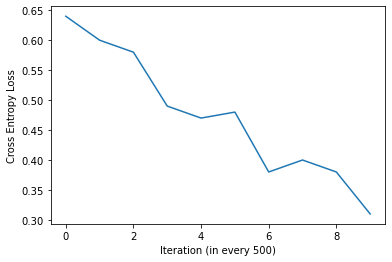

In [ ]:
#loss1
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [.64,.60,.58,.49,.47,.48,.38,.40,.38,.31]
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.63, 0.57, 0.55, 0.52, 0.52, 0.51, 0.54, 0.45, 0.47, 0.43]


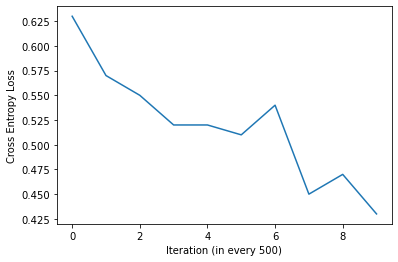

In [ ]:
#loss2
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [.63,.57,.55,.52,.52,.51,.54,.45,.47,.43]
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.6, 0.57, 0.52, 0.46, 0.42, 0.46, 0.23, 0.32, 0.24, 0.23]


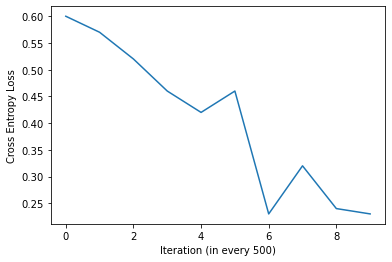

In [ ]:
#loss3
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [.60,.57,.52,.46,.42,.46,.23,.32,.24,.23]
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[0.6, 0.53, 0.5, 0.47, 0.43, 0.41, 0.23, 0.37, 0.31, 0.26]


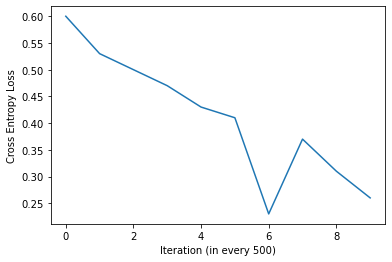

In [ ]:
#loss6
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [.60,.53,.50,.47,.43,.41,.23,.37,.31,.26]
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Accuracy Graphs**

[59.84, 61.79, 61.01, 60.91, 60.98, 61.79, 59.06, 60.65, 58.4, 61.86]


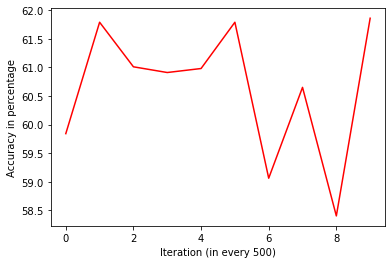

In [ ]:
#acc1
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [59.84,61.79,61.01,60.91,60.98,61.79,59.06,60.65,58.40,61.86]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[62.64, 63.07, 63.23, 62.58, 61.11, 61.79, 61.53, 60.36, 61.21, 61.04]


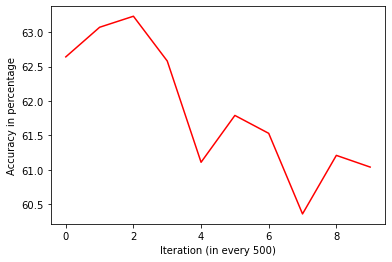

In [ ]:
#acc2
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [62.64,63.07,63.23,62.58,61.11,61.79,61.53,60.36,61.21,61.04]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[60.75, 63.62, 61.57, 61.63, 62.22, 61.92, 59.71, 61.21, 62.22, 60.82]


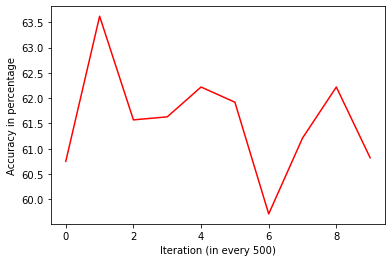

In [ ]:
#acc3
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [60.75,63.62,61.57,61.63,62.22,61.92,59.71,61.21,62.22,60.82]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[62.28, 63.2, 62.87, 62.61, 62.15, 62.32, 61.99, 61.4, 60.1, 60.98]


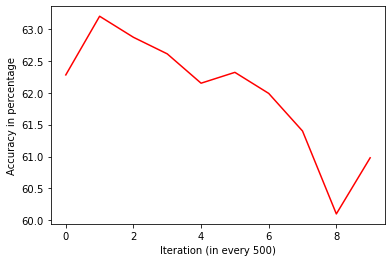

In [ ]:
#acc6
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [62.28,63.20,62.87,62.61,62.15,62.32,61.99,61.40,60.10,60.98]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

#Comparision Graph between Loss and Accuracy

**Case 1**
<div align="center">
<img src="https://drive.google.com/uc?id=1f6SyL8jsTOQvstEzfloyoWNp8_l8khlb" width="300">
<img src="https://drive.google.com/uc?id=1KkxhoIYAwXbTp8RS1TU2lE-KC4l4kK6U"width="300">
<figcaption>figure 2: Accuracy and Loss in Case 1 </figcaption>

**Case 2**
<div align="center">
<img src="https://drive.google.com/uc?id=1v-g-pZ5m5QtKhnJdBwdmiITel0T8EfjR" width="300">
<img src="https://drive.google.com/uc?id=1VFSP1TDhIW6TDiDsdXn1AQlnKnWKxZU4"width="300">
<figcaption>figure 3: Accuracy and Loss in Case 2 </figcaption>

**Case 3**
<div align="center">
<img src="https://drive.google.com/uc?id=1gyx1axBax-bnr27VscjWkkZgo3NMJjeZ" width="300">
<img src="https://drive.google.com/uc?id=1FPsjp-NqvpxyGdqc60uE4QkCAwO15_GS"width="300">
<figcaption>figure 4: Accuracy and Loss in Case 3 </figcaption>

**Case 4**
<div align="center">
<img src="https://drive.google.com/uc?id=1PP9fuztNcDVPXQsKWq_nykqn8WaUh-gB" width="300">
<img src="https://drive.google.com/uc?id=1G3tZKPnRwFuci1ro_87mledHqpG_yQSl"width="300">
<figcaption>figure 5: Accuracy and Loss in Case 4 </figcaption>

#Best Model

**Hyper Parameter Values**

$Batch$ $size = 400 $

$Iteration =6000$

$learning$ $Rate = 0.0009$

$Hidden$ $layer$  = $100$

$Activation$  = $SELU$





$Accuracy($%$) = 61.86$

**My best Model able to predict 3 correctly out of 5 in my testing.**

**Model Saving Code**

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'ekushna1.pkl')

**Model Loading Code**

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'ekushna1.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


**Load Image From Test Loader**

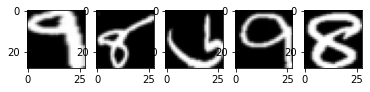

0
1
0
1
0


In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
   

plt.show()

for i in range(5):
    
    print(labels[i].numpy())

#plt.show()

**Counting Correctly Predicted Results**

In [ ]:
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [0 0 0 1 0]


# Drive Links for Train Models

> **Setting 1:** [https://drive.google.com/file/d/1wi3yTmUVsKFP3Yvlt0OGMGIBOlXSL_Yz/view?usp=sharing](https://)

> **Setting 2:** [https://drive.google.com/file/d/1L7UNg28OToXqoUqv6TaD4DKxF1jZ9PGw/view?usp=sharing](https://)

> **Setting 3:** [https://drive.google.com/file/d/1NmO89TdyusHwNXcHJKj8gooBCtkHavG6/view?usp=sharing](https://)

> **Setting 4:** [https://drive.google.com/file/d/1pLtnfLn3KZgs5EOZSHA80JzgH7K8IOAg/view?usp=sharing](https://)











